## ML Project: House Price Prediction (P2)

In [2]:
# import libraries for data mining and visualisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, accuracy_score

In [3]:
# load texas model training set
texas_trainset = pd.read_csv("texas_model_training_set.csv", index_col=0)
texas_trainset.head()

,Zip Code,Beds,Baths,Median Household Income(1k),Area Living Space(sqm),Price_p_living,Area_bath_sqm,Living_space,Price(1k)
0,75051,3,2,63.560,142.048687,2.780033,71.024344,5,394.9
1,75051,5,4,63.560,220.737528,1.879608,55.184382,9,414.9
2,75201,3,4,149.296,317.263745,9.440095,79.315936,7,2995.0
3,75201,2,2,149.296,140.004821,4.642697,70.002410,4,650.0
4,75201,2,3,149.296,189.986635,2.468595,63.328878,5,469.0


In [4]:
texas_trainset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5806 entries, 0 to 5805
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Zip Code                     5806 non-null   int64  
 1   Beds                         5806 non-null   int64  
 2   Baths                        5806 non-null   int64  
 3   Median Household Income(1k)  5806 non-null   float64
 4   Area Living Space(sqm)       5806 non-null   float64
 5   Price_p_living               5806 non-null   float64
 6   Area_bath_sqm                5806 non-null   float64
 7   Living_space                 5806 non-null   int64  
 8   Price(1k)                    5806 non-null   float64
dtypes: float64(5), int64(4)
memory usage: 453.6 KB


### Model Training

For training the model, X and Y are being assigned whereafter the training set and testing will be split. 
The X is called the input which is represented as a sample of different values (mathematically represented as a vector) although Y is target value that needed to me found through this project. 

According to the texas training set, the chosen feature as input for model training is the area bath space in squared meter. 

In [5]:
# assign the parameters for buidling linear regression model
X = texas_trainset[["Area_bath_sqm"]]
Y = texas_trainset["Price(1k)"]

# display the shape of the parameters before training the model
print(f"Input X - Shape: {X.shape}")
print(f"Output Y - Shape: {Y.shape}")

Input X - Shape: (5806, 1)
Output Y - Shape: (5806,)


In [15]:
# split data into training and testing sets
xtrain_txs, xtest_txs, ytrain_txs, ytest_txs = train_test_split(X, Y, test_size=0.15)

# shape of training and testing sets
print(f"Training set X: {xtrain_txs.shape}")
print(f"Testing set X: {xtest_txs.shape}")
print(f"Training set Y: {ytrain_txs.shape}")
print(f"Testing set Y: {ytest_txs.shape}")

Training set X: (4935, 1)
Testing set X: (871, 1)
Training set Y: (4935,)
Testing set Y: (871,)


In [7]:
# create linear regression model
model = LinearRegression()
model.fit(xtrain_txs, ytrain_txs)

# predict model 
y_pred = model.predict(xtest_txs)

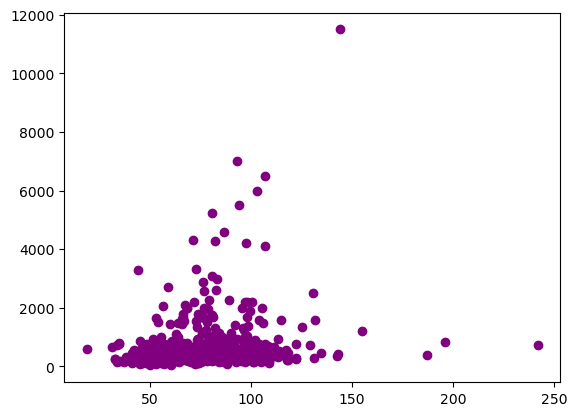

In [20]:
# scatter plot with sample data
plt.scatter(xtest_txs, ytest_txs, color="purple")
# plt.plot(xtest_txs, np.arange(0,871))

### Model Evaluation

In [24]:
# retrieve coefficients and intercepts for building linear regression model
model_coef = model.coef_
model_intercept = model.intercept_

print(f"Coefficient: {model_coef}")
print(f"Intercept: {model_intercept}")
# build prediction line
y_pred = model_coef*xtest_txs + model_intercept


Coefficient: [6.34636661]
Intercept: 64.89912925446271


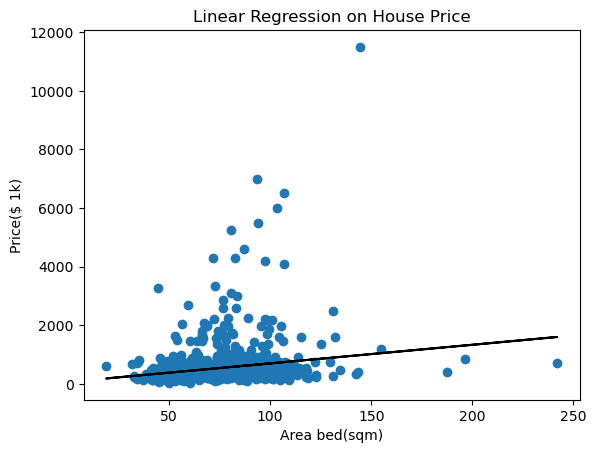

In [29]:
# plot regression line
plt.scatter(xtest_txs, ytest_txs)
plt.plot(xtest_txs, y_pred, color="black")

# add description
plt.xlabel("Area bed(sqm)")
plt.ylabel("Price($ 1k)")
plt.title("Linear Regression on House Price")
plt.show()

In [26]:
# check accuracy 
model_acc = accuracy_score(ytest_txs, y_pred)
print(f"Model accuracy: {model_acc}")

ValueError: continuous is not supported